In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


pd.option_context('mode.use_inf_as_na', True)
pd.option_context('mode.use_inf_as_na', True)

In [2]:
pd.option_context('mode.use_inf_as_na', True)
pd.option_context('mode.use_inf_as_na', True)

# Reading the DataFrame

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.set_index('PassengerId', inplace=True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [6]:
train_female = train_data.loc[train_data.Sex == "female"]["Survived"]
rate_women = round((sum(train_female)/len(train_female))*100,2)
print("% of women survived", rate_women)

% of women survived 74.2


In [7]:
train_male = train_data.loc[train_data.Sex == "male"]["Survived"]
rate_men = round((sum(train_male)/len(train_male))*100,2)
print("% of women survived", rate_men)

% of women survived 18.89


# EDA

In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
category_column = train_data.select_dtypes(include=['object', 'category']).columns
train_data[category_column]

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,NaN,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S


In [11]:
non_category_column = train_data.select_dtypes(exclude=['object', 'category']).columns
train_data[non_category_column]

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


## checking missing value

In [12]:

train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# checking % of missing value
round(((train_data.isnull().sum())/len(train_data.index))*100,4)

Survived     0.0000
Pclass       0.0000
Name         0.0000
Sex          0.0000
Age         19.8653
SibSp        0.0000
Parch        0.0000
Ticket       0.0000
Fare         0.0000
Cabin       77.1044
Embarked     0.2245
dtype: float64

In [14]:
# drop column where Nan more than 50%
train_data.dropna(thresh=len(train_data)/2,axis=1,inplace=True)

In [15]:
# removing rows where Nan present
train_data.dropna(axis=0,inplace=True)

In [16]:
(train_data.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
round(((train_data.isnull().sum())/len(train_data.index))*100,4)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

## check for outliers

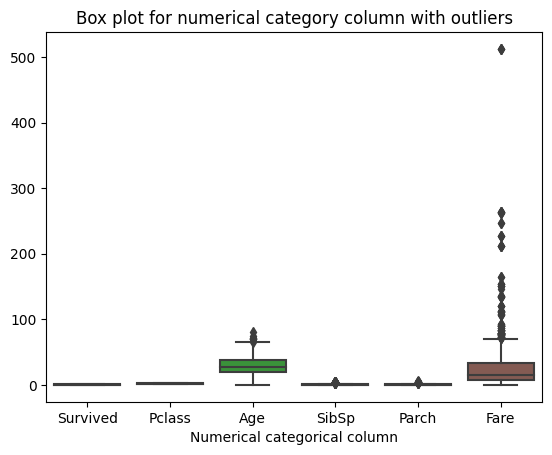

In [19]:
sns.boxplot(data=train_data[non_category_column])
plt.title('Box plot for numerical category column with outliers')
plt.xlabel('Numerical categorical column')
plt.show()

## removing outliers

In [20]:

def removal_outliers(df):
    for col in df.columns:
        if (((df[col].dtype)=="float64") | ((df[col].dtype)=="int64")):
            print("Removing outlier of", col)
            percentile_low = df[col].quantile(0.1) 
            percentile_upper = df[col].quantile(0.75)
            iqr = percentile_upper - percentile_low
            upper_limit = percentile_upper + 1.5 * iqr
            lower_limit = percentile_low - 1.5 * iqr 
            df[col] = df[col][((df.loc[:, col]< upper_limit) & (df.loc[:, col]> lower_limit))]
            
        else:
            print(col, "Column is an object type")
            df[col]=df[col]
    return df

In [21]:
final_train = removal_outliers(train_data)

Removing outlier of Survived
Removing outlier of Pclass
Name Column is an object type
Sex Column is an object type
Removing outlier of Age
Removing outlier of SibSp
Removing outlier of Parch
Ticket Column is an object type
Removing outlier of Fare
Embarked Column is an object type


In [22]:
final_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,710.00000,677.000000,697.000000,617.000000
mean,0.404494,2.240169,29.50869,0.344165,0.352941,19.026803
std,0.491139,0.836854,14.29223,0.547735,0.651233,14.282146
min,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.00000,0.000000,0.000000,7.925000
50%,0.000000,2.000000,28.00000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,38.00000,1.000000,1.000000,26.283300
max,1.000000,3.000000,71.00000,2.000000,2.000000,69.300000


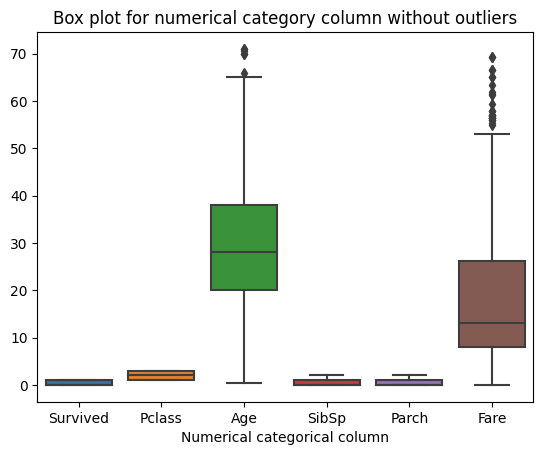

In [23]:
sns.boxplot(data=final_train[non_category_column])
plt.title('Box plot for numerical category column without outliers')
plt.xlabel('Numerical categorical column')
plt.show()

In [24]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       710 non-null    float64
 5   SibSp     677 non-null    float64
 6   Parch     697 non-null    float64
 7   Ticket    712 non-null    object 
 8   Fare      617 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 61.2+ KB


In [25]:
round(((final_train.isnull().sum())/len(train_data.index))*100,4)

Survived     0.0000
Pclass       0.0000
Name         0.0000
Sex          0.0000
Age          0.2809
SibSp        4.9157
Parch        2.1067
Ticket       0.0000
Fare        13.3427
Embarked     0.0000
dtype: float64

## replacing Nan values with respective median of the column

In [26]:
for col in final_train.columns:
    if final_train[col].isnull().sum()> 0:
        val_to_replace = final_train[col].median()
        final_train.fillna({col: val_to_replace}, inplace=True)
# checking for nan values
round(((final_train.isnull().sum())/len(train_data.index))*100,4)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [27]:
# Removing column "Name" as PassengerId is tagged along 
final_train.drop(['Name', 'Ticket'],axis=1,inplace=True)

In [28]:
final_train.replace([np.inf, -np.inf], np.nan, inplace=True)

##  Univariate Analysis
* Categorical Variables
  1. Unordered - rank frequency variable
  2. Ordered - histogram, bar

Plotting graph with Survived 

In [29]:
def plot_with_y(df, var):
    for col in var:
        # Create a figure with 1 row and 2 columns for barplot and histplot
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        
        # Barplot on the first subplot
        sns.barplot(x='Survived', y=col, data=df, ax=axes[0], hue='Survived')
        axes[0].set_title(f'{col} vs Survived')

        sns.histplot(df[col], kde=True, ax=axes[1])  # KDE for distribution curve
        axes[1].set_title(f'{col} Distribution')
        
        plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


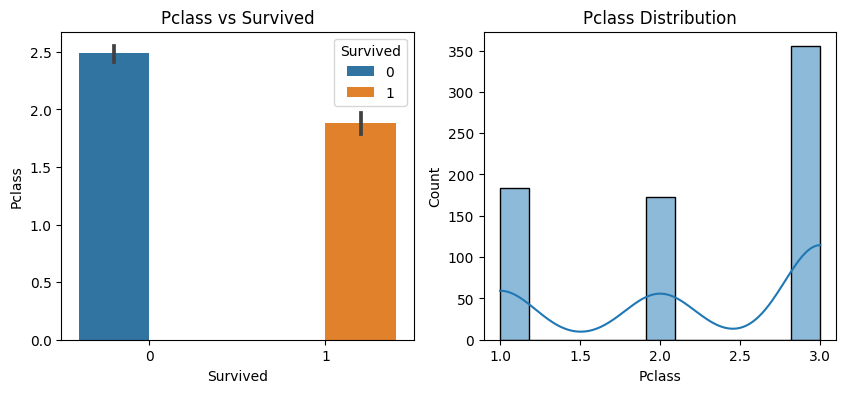

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


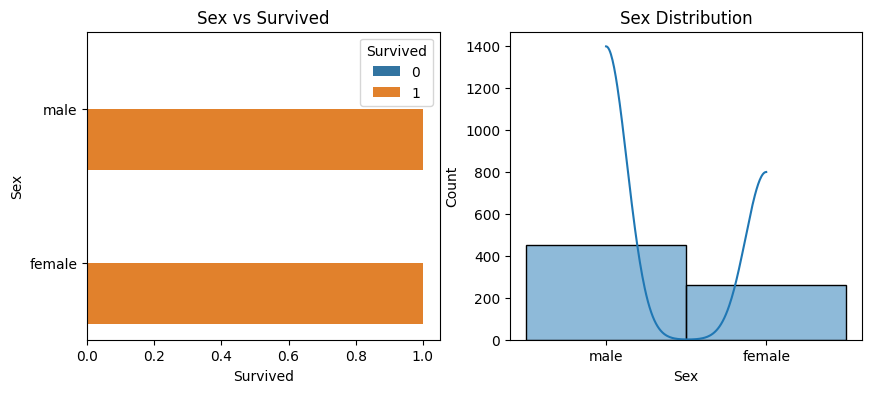

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


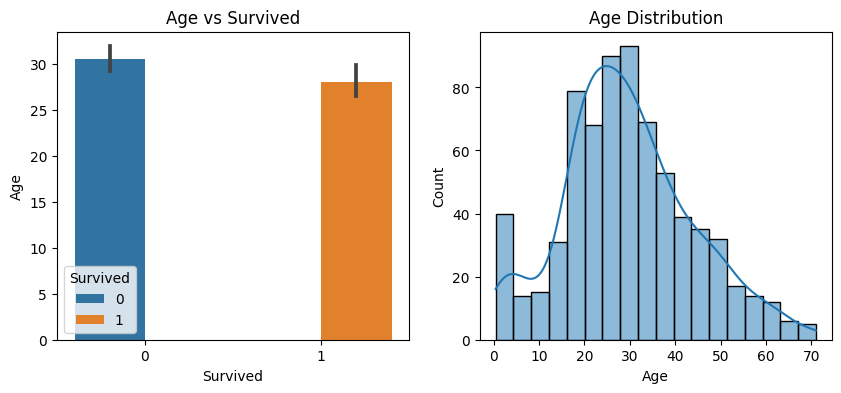

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


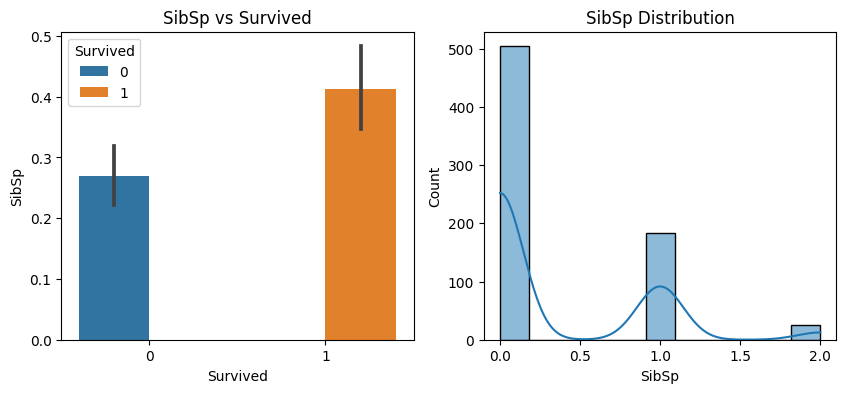

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


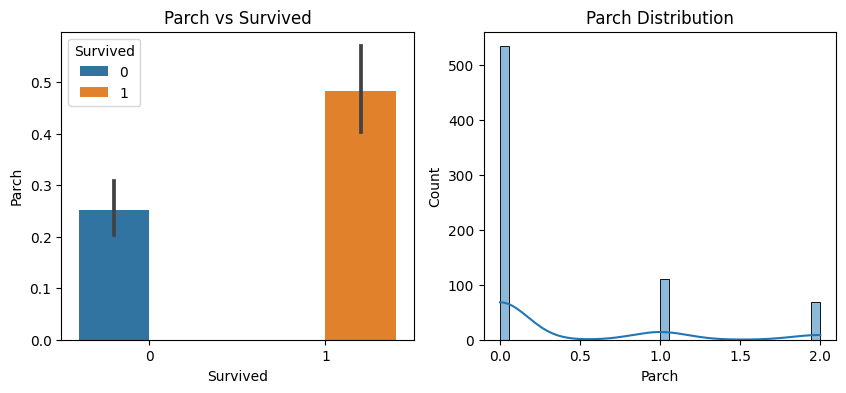

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


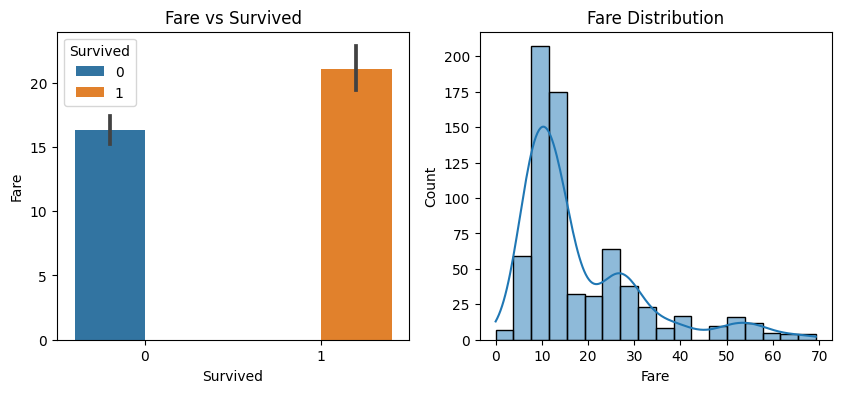

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


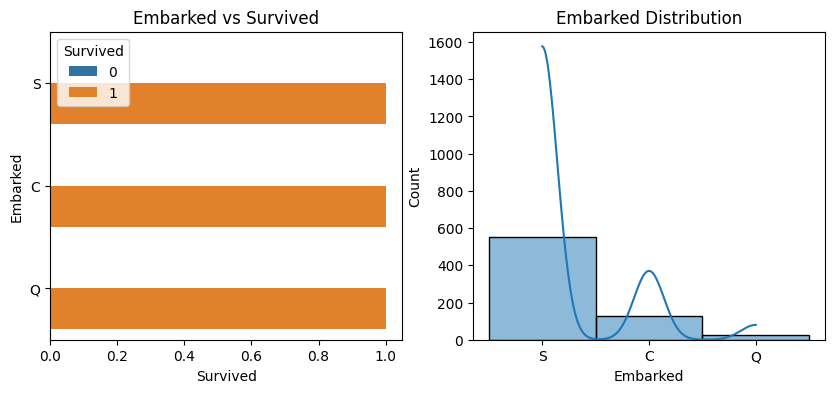

In [30]:
variable = list(final_train.columns)
variable.remove('Survived')
plot_with_y(final_train, variable)

## Bivariate Analysis

Text(0.5, 1.0, 'Box plot of Sex Vs Fare ')

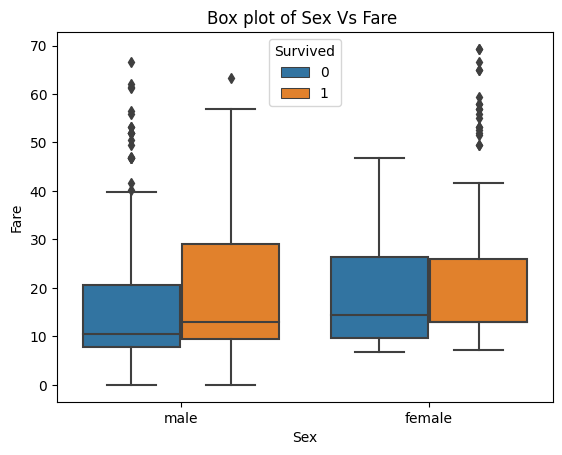

In [31]:
# categorical and continous
sns.boxplot(data = final_train, x='Sex', y='Fare', hue="Survived")
plt.title("Box plot of Sex Vs Fare ")

In [32]:
# summarize complete dataset wrt sex and Embarked
final_train.pivot_table(index="Sex", columns=["Embarked"], aggfunc="count")

Age          Fare          Parch          Pclass          SibSp      \
Embarked   C   Q    S    C   Q    S     C   Q    S      C   Q    S     C   Q   
Sex                                                                            
female    61  12  186   61  12  186    61  12  186     61  12  186    61  12   
male      69  16  368   69  16  368    69  16  368     69  16  368    69  16   

              Survived           
Embarked    S        C   Q    S  
Sex                              
female    186       61  12  186  
male      368       69  16  368

In [33]:
cross1 = pd.crosstab(index=[final_train.Parch], columns=final_train.SibSp,values=final_train.Fare,
                             aggfunc='mean')
cross2 = pd.crosstab(index=[final_train.Parch], columns=final_train.SibSp,values=final_train.Age,
                             aggfunc='mean')

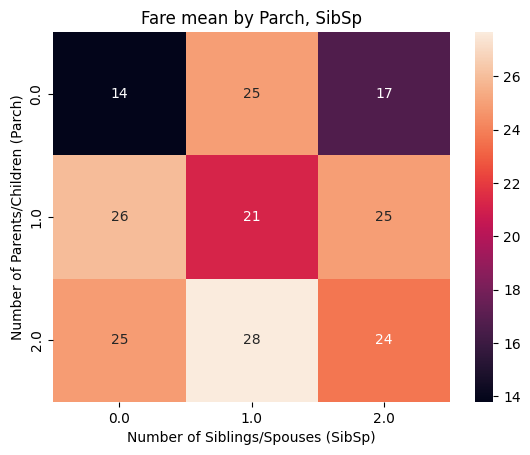

In [34]:
sns.heatmap(cross1, annot=True)
plt.title('Fare mean by Parch, SibSp')
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.ylabel("Number of Parents/Children (Parch)")
plt.show()

Fare minimum for no parents/children or sibblings and maximum for 2 parents and siblings/spouse on board

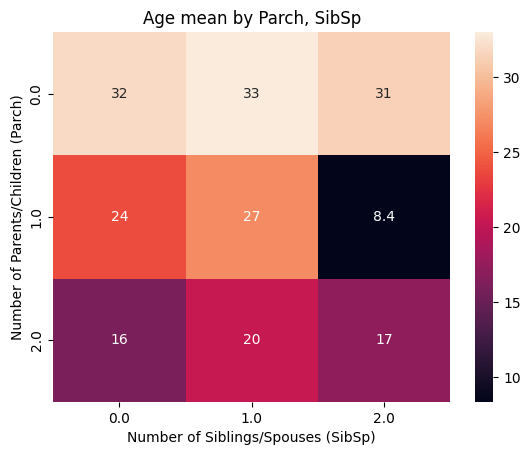

In [35]:
sns.heatmap(cross2, annot=True)
plt.title('Age mean by Parch, SibSp')
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.ylabel("Number of Parents/Children (Parch)")
plt.show()

Maximum mean age of no Parents/children and minimum mean age of 1 parents/children and 2 siblings/spouses

In [36]:
train_crosstab = pd.crosstab(index=[final_train.Pclass, final_train.Parch],
                             columns=final_train.SibSp,
                             values=final_train.Fare,
                             aggfunc='mean')
train_crosstab1 = pd.crosstab(index=[final_train.Pclass, final_train.Parch],
                             columns=final_train.SibSp,
                             values=final_train.Age,
                             aggfunc='mean')

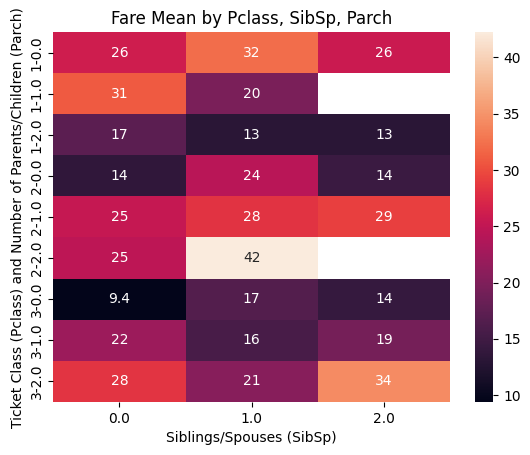

In [37]:
sns.heatmap(train_crosstab, annot=True)
plt.title("Fare Mean by Pclass, SibSp, Parch")
plt.xlabel("Siblings/Spouses (SibSp)")
plt.ylabel("Ticket Class (Pclass) and Number of Parents/Children (Parch)")
plt.show()

Mean Fare maximum for second class and 2 parents, minimum for 3rd class and no parents

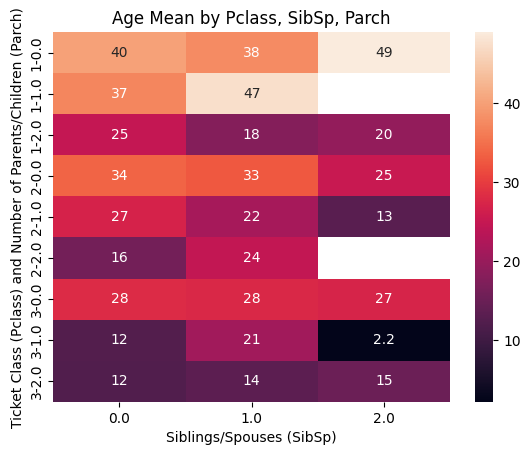

In [38]:
sns.heatmap(train_crosstab1, annot=True)
plt.title("Age Mean by Pclass, SibSp, Parch")
plt.xlabel("Siblings/Spouses (SibSp)")
plt.ylabel("Ticket Class (Pclass) and Number of Parents/Children (Parch)")
plt.show()

Maximum Age mean for first class and no parents/children, minimum for third class and 1 parent/children on board

# [](http://)Data preparation

In [39]:
# check yes/no in the dataset
# APPLYMAP IS MAP 
yes_no_present = final_train.map(lambda x : x in ['yes','no']).any().any()
print(yes_no_present)

# If present check for column 
# also keep in mind for case sensitive

False


In [40]:
# column name with yes or no
columns_with_yes_no = final_train.columns[final_train.apply(lambda col: col.astype(str).str.lower().isin(['yes','no'])).all()]
print(columns_with_yes_no)

Index([], dtype='object')


In [41]:
# convert male to 0 and female to 1
final_train['Sex'] = final_train['Sex'].map({'male':0, 'female':1})

In [42]:
# convert to binary
# C = Cherbourg, Q = Queenstown, S = Southampton
# 0 = c, 1 = Q, 2 = S
final_train['Embarked'] = final_train['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [43]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    float64
 5   Parch     712 non-null    float64
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 50.1 KB


## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# putting feature variable to X
X = final_train.drop(['Survived'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1.0,0.0,7.250,2
2,1,1,38.0,1.0,0.0,13.000,0
3,3,1,26.0,0.0,0.0,7.925,2
4,1,1,35.0,1.0,0.0,53.100,2
5,3,0,35.0,0.0,0.0,8.050,2


In [46]:
# putting output variable to y
y = final_train['Survived']

In [47]:
# spitting the data into train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
520,3,0,32.0,0.0,0.0,7.8958,2
890,1,0,26.0,0.0,0.0,30.0000,0
622,1,0,42.0,1.0,0.0,52.5542,2
142,3,1,22.0,0.0,0.0,7.7500,2
716,3,0,19.0,0.0,0.0,7.6500,2


## Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

# Select only numeric columns (int and float types)
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# apply fit.transform only to selected columns only
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
520,0.906512,-0.745822,0.206227,-0.606017,-0.523238,-0.765974,0.523236
890,-1.450893,-0.745822,-0.221721,-0.606017,-0.523238,0.874535,-2.043971
622,-1.450893,-0.745822,0.919473,1.212034,-0.523238,2.548441,0.523236
142,0.906512,1.340803,-0.507019,-0.606017,-0.523238,-0.776794,0.523236
716,0.906512,-0.745822,-0.720993,-0.606017,-0.523238,-0.784216,0.523236


## Corelation Matrix

In [51]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

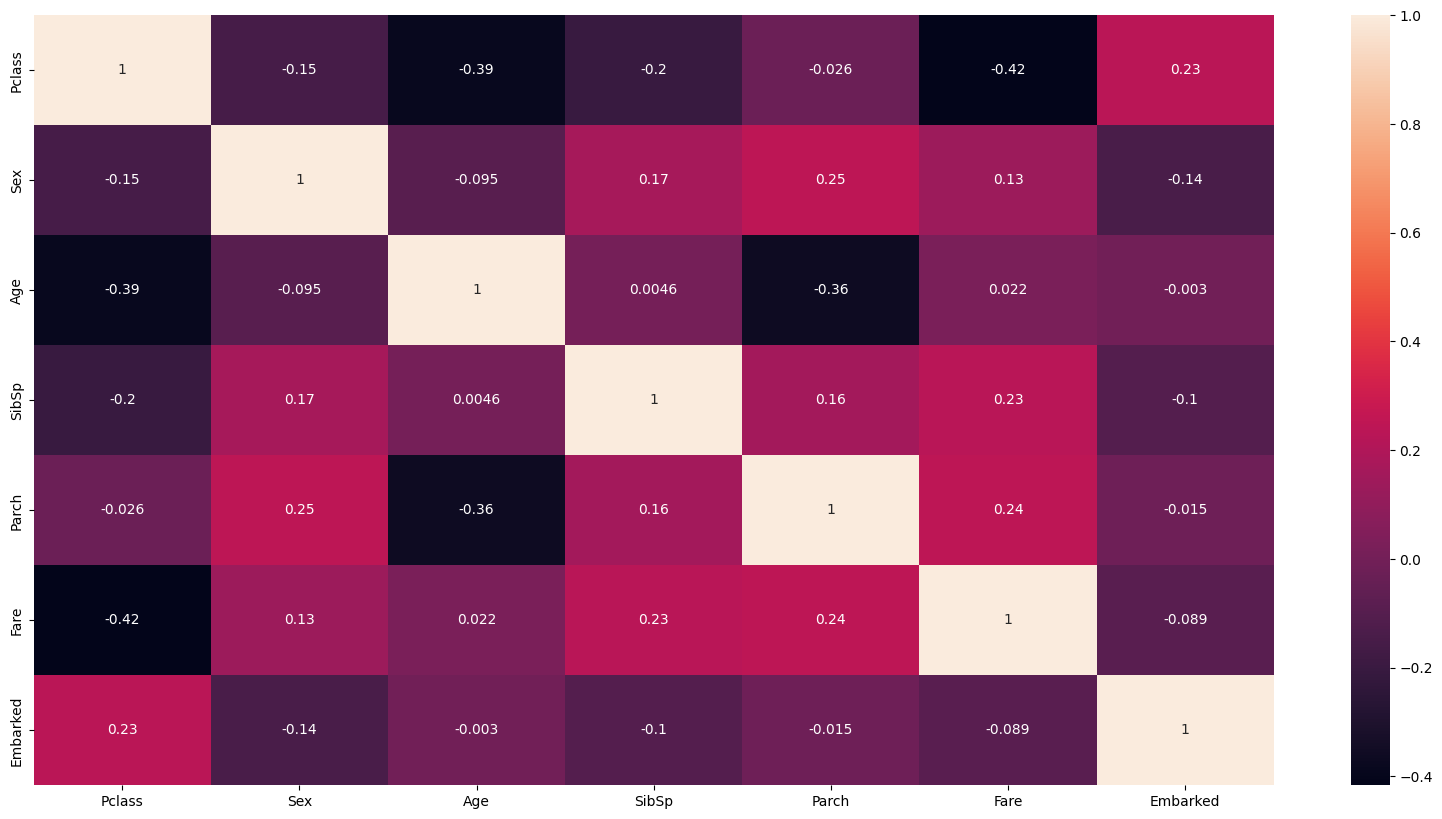

In [52]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[numeric_cols].corr(),annot = True)
plt.show()

No highly corealated variables

# [](http://)Model

## statsmodel


In [53]:
import statsmodels.api as sm

In [54]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the regression Model by GLM
lr_1 = sm.Logit(y_train, X_train_sm)
lr_model_1 = lr_1.fit()
lr_model_1.params

Optimization terminated successfully.
         Current function value: 0.442645
         Iterations 6


const      -0.587020
Pclass     -1.193989
Sex         1.204921
Age        -0.480262
SibSp       0.077578
Parch      -0.070614
Fare       -0.041363
Embarked   -0.086719
dtype: float64

In [55]:
print(lr_model_1.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      490
Method:                           MLE   Df Model:                            7
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.3413
Time:                        13:10:46   Log-Likelihood:                -220.44
converged:                       True   LL-Null:                       -334.67
Covariance Type:            nonrobust   LLR p-value:                 1.054e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5870      0.122     -4.825      0.000      -0.825      -0.349
Pclass        -1.1940      0.161     -7.420      0.000      -1.509      -0.879
Sex            1.2049      0.126      9.570      0.0

1. R square and F-statistic low
2. p value more for SibSp, Parch, Fare, Embarked
3. p value zer for Pclass, Sex, Age
4. R square is 0.4, meaninf 40% of variance in Survived explained
5. Intercept (const): The baseline survival rate (when all other variables are zero) is about 0.398, highly significant (p < 0.001).
6. Pclass(0,1,2) coef is negative , increasing class decreases chances of survival
7. Sex(0(male), female(1))- coef is positive 0 being less survival female being more chance
8. Age- increasing age decreasing survival rate


In [56]:
#checking vifs
from statsmodels.stats.outliers_influence import variance_inflation_factor

Dropping variables
1. high p value & high vif
2. high p value anf low vif
3. low p value and high vifgh VIF.

VIF ELIMINATION
1. VIF > 10, then we should definitely eliminate the variable.
2. VIF > 5, We need to inspect the variable before eliminating it.
3. VIF < 5, is definitely a good variable and we should not eliminate it.
4. p value> 0.05 highpeat


In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,1.60
2,Age,1.44
5,Fare,1.32
4,Parch,1.31
1,Sex,1.12
3,SibSp,1.10
6,Embarked,1.08


In [58]:
# dropping variables with high p-values FARE wiht 0.68 , LOW VIF 1.32
X_lr = X_train.drop('Fare', axis=1)

In [59]:
# Build a second fitted model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_lr)
# Fit the regression Model
lr_2 = sm.Logit(y_train, X_train_sm)
lr_model_2 = lr_2.fit()
# summary of the model
print(lr_model_2.summary())

Optimization terminated successfully.
         Current function value: 0.442738
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.3412
Time:                        13:10:46   Log-Likelihood:                -220.48
converged:                       True   LL-Null:                       -334.67
Covariance Type:            nonrobust   LLR p-value:                 1.708e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5891      0.122     -4.848      0.000      -0.827      -0.351
Pclass        -1.1767      0.

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_lr.columns
vif['VIF'] = [variance_inflation_factor(X_lr.values, i) for i in range (X_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Age,1.43
0,Pclass,1.37
4,Parch,1.27
1,Sex,1.12
3,SibSp,1.08
5,Embarked,1.08


In [61]:
# dropping SibSp high p value (0.566) and low vif (1.08)
X_lr_1= X_lr.drop('SibSp', axis=1)

In [62]:
# Build a thrid fitted model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_lr_1)
# Fit the regression Model by OLS
lr_3 = sm.Logit(y_train, X_train_sm)
lr_model_3 = lr_3.fit()
# summary of the model
print(lr_model_3.summary())

Optimization terminated successfully.
         Current function value: 0.443107
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.3406
Time:                        13:10:46   Log-Likelihood:                -220.67
converged:                       True   LL-Null:                       -334.67
Covariance Type:            nonrobust   LLR p-value:                 2.870e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5868      0.121     -4.836      0.000      -0.825      -0.349
Pclass        -1.1884      0.

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_lr_1.columns
vif['VIF'] = [variance_inflation_factor(X_lr_1.values, i) for i in range (X_lr_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Age,1.43
0,Pclass,1.33
3,Parch,1.25
1,Sex,1.11
4,Embarked,1.08


In [64]:
# drop Parch as high p value 0.581 anf low vif 1.25
X_lr_2= X_lr_1.drop('Parch', axis=1)

In [65]:
# Build a fourth fitted model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_lr_2)
# Fit the regression Model by OLS
lr_4 = sm.Logit(y_train, X_train_sm)
lr_model_4 = lr_4.fit()
# summary of the model
print(lr_model_4.summary())

Optimization terminated successfully.
         Current function value: 0.443413
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.3402
Time:                        13:10:47   Log-Likelihood:                -220.82
converged:                       True   LL-Null:                       -334.67
Covariance Type:            nonrobust   LLR p-value:                 4.138e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5879      0.121     -4.847      0.000      -0.826      -0.350
Pclass        -1.1754      0.

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_lr_2.columns
vif['VIF'] = [variance_inflation_factor(X_lr_2.values, i) for i in range (X_lr_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,1.30
2,Age,1.22
3,Embarked,1.08
1,Sex,1.06


In [67]:
# drop Embarked as high p value 0.440 anf low vif 1.08
X_lr_3= X_lr_2.drop('Embarked', axis=1)

In [68]:
# Build a fifth fitted model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_lr_3)
# Fit the regression Model by OLS
lr_5 = sm.Logit(y_train, X_train_sm)
lr_model_5 = lr_5.fit()
# summary of the model
print(lr_model_5.summary())

Optimization terminated successfully.
         Current function value: 0.444012
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      494
Method:                           MLE   Df Model:                            3
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.3393
Time:                        13:10:47   Log-Likelihood:                -221.12
converged:                       True   LL-Null:                       -334.67
Covariance Type:            nonrobust   LLR p-value:                 5.864e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5910      0.121     -4.877      0.000      -0.829      -0.353
Pclass        -1.2002      0.

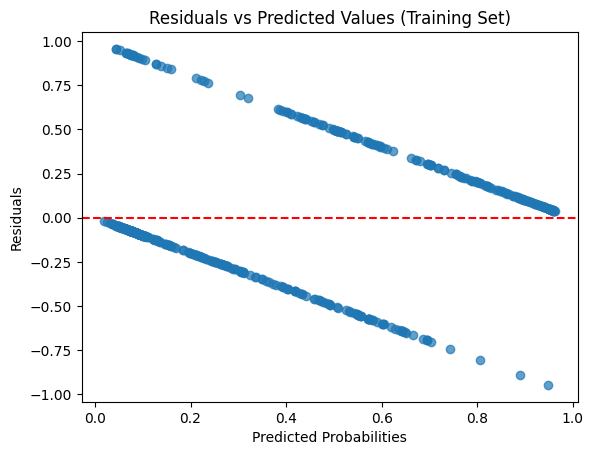

In [69]:
# Add constant to X_lr_3 for prediction
X_lr_3_with_const = sm.add_constant(X_lr_3)

# Predict probabilities using the trained model
y_train_pred_prob = lr_model_5.predict(X_lr_3_with_const)

# Calculate residuals
train_residuals = y_train - y_train_pred_prob

# Plot residuals
import matplotlib.pyplot as plt
plt.scatter(y_train_pred_prob, train_residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted Values (Training Set)")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Residuals")
plt.show()

Residuals ranging from -1 to 1 and forming a funnel shape due to heteroscedasticity. The two distinct bands reflect the binary nature of the target variable. There may be room to improve the model by addressing potential issues like multicollinearity, missing interactions, or non-linear relationships.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


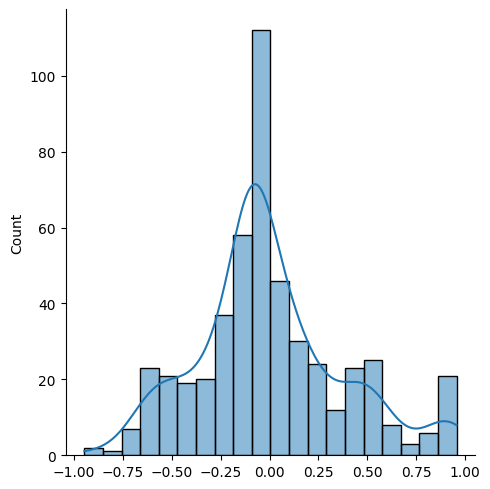

In [70]:
sns.displot(train_residuals, kde=True)
plt.show()

The histogram with a KDE overlay visualizes the distribution of residuals for the training set. Key points:

    Centered Residuals: The residuals are centered around 0, indicating no significant bias in predictions.
    Symmetry: The distribution appears approximately symmetric, which is expected in a well-behaved logistic regression model.
    Outliers: There are residuals near -1 and 1, reflecting potential extreme predictions or misclassifications.

In [71]:
y_train_pred_binary = (y_train_pred_prob >= 0.5).astype(int)

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_binary))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       300
           1       0.76      0.74      0.75       198

    accuracy                           0.80       498
   macro avg       0.79      0.79      0.79       498
weighted avg       0.80      0.80      0.80       498



The model performs better on Class 0 than Class 1, as indicated by higher precision, recall, and F1-score for Class 0.
The overall accuracy of 80% is reasonable but might be improved, especially for Class 1.

## Prediction on X_test

In [73]:
# Precprocess X_Test
selected_feature = X_lr_3.columns
X_test = X_test[selected_feature]

In [74]:
scaler = StandardScaler()

# Select only numeric columns (int and float types)
numeric_cols = X_test.select_dtypes(include=['float64', 'int64']).columns

# apply fit.transform only to selected columns only
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])

In [75]:
# prediction on X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Pclass,Sex,Age
PassengerId,,,,
721,1.0,-0.324290,1.281396,-1.653850
880,1.0,-1.563543,1.281396,1.731634
361,1.0,0.914962,-0.780399,0.648279
193,1.0,0.914962,1.281396,-0.773624
771,1.0,0.914962,-0.780399,-0.435076
...,...,...,...,...
161,1.0,0.914962,-0.780399,0.919118
831,1.0,0.914962,1.281396,-1.044463
95,1.0,0.914962,-0.780399,1.934763


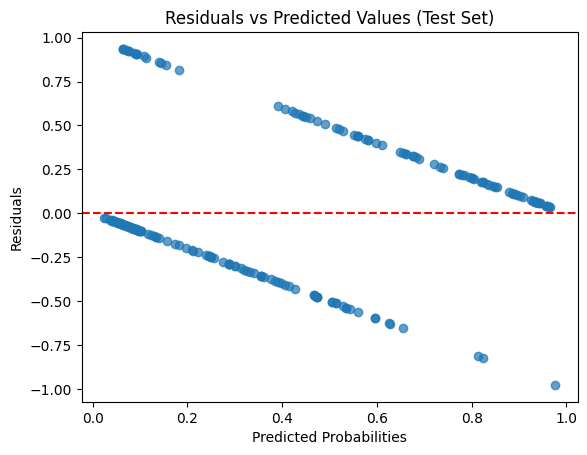

In [76]:
# prediction on train set
y_test_pred = lr_model_5.predict(X_test_sm)

# Calculate residuals
test_residuals = y_test - y_test_pred

# Plot residuals
import matplotlib.pyplot as plt
plt.scatter(y_test_pred, test_residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted Values (Test Set)")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Residuals")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


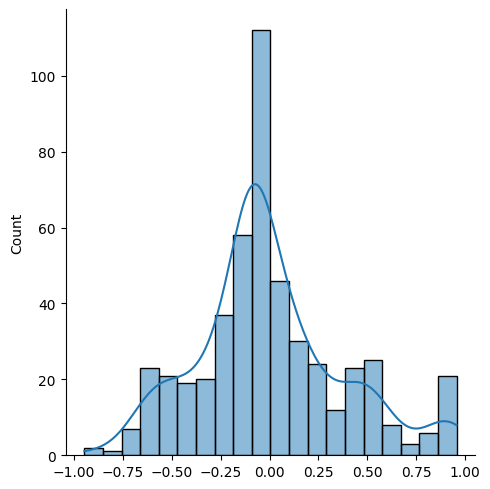

In [77]:
sns.displot(train_residuals, kde=True)
plt.show()

In [78]:
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)
print(classification_report(y_test, y_test_pred_binary))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       124
           1       0.79      0.70      0.74        90

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.79       214
weighted avg       0.79      0.79      0.79       214



## Test Data

In [79]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
# making prediction using final model

# applying scaling on test data
# Select only numeric columns (int and float types)
test_data_lr = test_data
test_data_lr.set_index('PassengerId', inplace=True)

# convert male to 0 and female to 1
test_data_lr.loc[:,'Sex'] =test_data_lr.loc[:,'Sex'].map({'male':0, 'female':1})
# Ensure the column's data type is float
test_data_lr['Sex'] = test_data_lr['Sex'].astype(float)

numeric_cols = test_data_lr.select_dtypes(include=['float64', 'int64']).columns

# apply fit.transform only to selected columns only
test_data_lr[numeric_cols] = scaler.fit_transform(test_data_lr[numeric_cols])

test_data_lr.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,0.873482,"Kelly, Mr. James",-0.755929,0.298549,-0.499470,-0.400248,330911,-0.497811,NaN,Q
893,0.873482,"Wilkes, Mrs. James (Ellen Needs)",1.322876,1.181328,0.616992,-0.400248,363272,-0.512660,NaN,S
894,-0.315819,"Myles, Mr. Thomas Francis",-0.755929,2.240662,-0.499470,-0.400248,240276,-0.464532,NaN,Q
895,0.873482,"Wirz, Mr. Albert",-0.755929,-0.231118,-0.499470,-0.400248,315154,-0.482888,NaN,S
896,0.873482,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.322876,-0.584229,0.616992,0.619896,3101298,-0.417971,NaN,S


In [81]:
# selected feature
test_data_lr = test_data_lr[selected_feature]

In [82]:
# adding constant variable to test dataframe
X_test_data = sm.add_constant(test_data_lr)

In [83]:
for col in X_test_data.columns:
    if X_test_data[col].isnull().sum()> 0:
        val_to_replace = X_test_data[col].median()
        X_test_data.fillna({col: val_to_replace}, inplace=True)
# checking for nan values
round(((X_test_data.isnull().sum())/len(X_test_data.index))*100,4)

const     0.0
Pclass    0.0
Sex       0.0
Age       0.0
dtype: float64

In [84]:
X_test_data

,const,Pclass,Sex,Age
PassengerId,,,,
892,1.0,0.873482,-0.755929,0.298549
893,1.0,0.873482,1.322876,1.181328
894,1.0,-0.315819,-0.755929,2.240662
895,1.0,0.873482,-0.755929,-0.231118
896,1.0,0.873482,1.322876,-0.584229
...,...,...,...,...
1305,1.0,0.873482,-0.755929,-0.231118
1306,1.0,-1.505120,1.322876,0.616350
1307,1.0,0.873482,-0.755929,0.581038


In [85]:
print(X_test_data.dtypes)

const     float64
Pclass    float64
Sex       float64
Age       float64
dtype: object


In [86]:
#making prediction using fifth model
y_pred = lr_model_5.predict(X_test_data)

In [87]:
result = pd.concat([X_test_data, y_pred], axis=1)

In [88]:
result.rename(columns={result.columns[-1]:'Survived'}, inplace=True)
result

,const,Pclass,Sex,Age,Survived
PassengerId,,,,,
892,1.0,0.873482,-0.755929,0.298549,0.063816
893,1.0,0.873482,1.322876,1.181328,0.357360
894,1.0,-0.315819,-0.755929,2.240662,0.104709
895,1.0,0.873482,-0.755929,-0.231118,0.079899
896,1.0,0.873482,1.322876,-0.584229,0.554800
...,...,...,...,...,...
1305,1.0,0.873482,-0.755929,-0.231118,0.079899
1306,1.0,-1.505120,1.322876,0.616350,0.925964
1307,1.0,0.873482,-0.755929,0.581038,0.056524


In [89]:
result['Survived'] = round(result['Survived'],1)
result['Survived'] =(result['Survived']>=0.5).astype(int)
result.head()

,const,Pclass,Sex,Age,Survived
PassengerId,,,,,
892,1.0,0.873482,-0.755929,0.298549,0
893,1.0,0.873482,1.322876,1.181328,0
894,1.0,-0.315819,-0.755929,2.240662,0
895,1.0,0.873482,-0.755929,-0.231118,0
896,1.0,0.873482,1.322876,-0.584229,1


In [90]:
final_result = result.drop(['const','Pclass','Sex','Age'], axis=1)
final_result.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [91]:
final_result.reset_index(inplace=True)
final_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [92]:
final_result.to_csv('submission_logit.csv', index=False)